<img src="images\Logo_UCLL_ENG_RGB.png"/>

# Chapter 1: introduction to the data science cycle

## CRISP-DM and the data science process

<center><img src="images/CRISP-DM.png" style="background-color:white; border-radius:15px;"/></center>

## Case study: The Titanic

Late in the evening of the 14th of April 1912 a ship on its way from Southampton to London called the Titanic collided with an Iceberg and tragically crashed.  You, being interested in data & AI, realise you can use this information to figure out who is likely to survive.

You have access to the following variables:

| Variable | Description |
|----------|-------------|
| PassengerId   | A unique identifier for each passenger |
| Survived      | Whether the passenger survived or not (0 = No, 1 = Yes) |
| Pclass        | The class of the ticket the passenger purchased (1 = 1st, 2 = 2nd, 3 = 3rd) |
| Name          | The name of the passenger |
| Sex           | The gender of the passenger |
| Age           | The age of the passenger |
| SibSp         | The number of siblings or spouses the passenger had aboard the Titanic |
| Parch         | The number of parents or children the passenger had aboard the Titanic |
| Ticket        | The ticket number of the passenger |
| Fare          | How much the passenger paid for their ticket |
| Cabin         | Which cabin the passenger was in |
| Embarked      | Where the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton) |

### Business understanding


1. Identifying your business goals: what do we want to achieve. These are broad goals beyond data & AI
2. Assessing your situation: What resources do we have (data, experts, hardware, software, ...), requirements, constraints, risks, ...
3. Defining your data-mining goals: How do we specifically want to achieve these with data & AI and what are our deliverables
4. Formulating a project plan

Specifically for our case study we could have two goals: understanding what contributes to someone surviving the crash or simply predicting who will survive.

### Data understanding

1. Gathering data
2. Describing data
3. Exploring data
4. Verifying data quality 

In [40]:
import pandas as pd

# Round all numbers to 2 decimal places
pd.options.display.float_format = '{:,.2f}'.format

# Read the data from the csv file
titanic_df = pd.read_csv('data/train.csv')
# Show the first rows of the data
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.86,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.13,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.07,NaN,C


<blockquote> 
💡 This phase is all about exploring and asking the right questions to understand the data. The more experience you get with data & AI the easier it becomes to formulate these.
</blockquote>


A few standard questions you can ask:

<blockquote> 

**Q1:** How much data do I have?

**Q2:** There are a few missing values in the Cabin column. How big of a problem is this?  (Typically machine learning algorithms can not deal with null values)

**Q3:** How many people survived in this dataset?

**Q4:** Are the tickets names standardised? What do they mean?

</blockquote> 


In [41]:
titanic_df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

There are 687 missing values in the Cabin column, 177 missing in the Age column and 2 missing in the Embarked column.

In [42]:
titanic_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In this dataset 342 people survived and 549 people died.

<blockquote> 
❓ Before we start analying the data: do you think all of these variables are relevant to predict who does or does not survive? Which would you remove?
</blockquote> 

Passenger ID, name, and ticket should be unique for each passenger and therefore irrelevant to predict survival.
<br/>
Cabin is also missing for a lot of passengers.

In [43]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [44]:
titanic_df.groupby(["Survived", "Pclass"]).size()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

We can easily see that there were more people from the 1st class that survived than from the 2nd and 3rd class. Maybe it's even easier if we look at the percentages:

In [45]:
percentage_survived = titanic_df.groupby(["Survived", "Pclass"]).size() / titanic_df.groupby(["Pclass"]).size() * 100
percentage_survived.loc[1]

Pclass
1   62.96
2   47.28
3   24.24
dtype: float64

In [46]:
titanic_df.groupby(["Survived"])["Age"].mean()

Survived
0   30.63
1   28.34
Name: Age, dtype: float64

In [47]:
titanic_df.groupby(["Survived"])["Fare"].mean()

Survived
0   22.12
1   48.40
Name: Fare, dtype: float64

In [48]:
titanic_df.groupby(["Pclass"])["Fare"].mean()

Pclass
1   84.15
2   20.66
3   13.68
Name: Fare, dtype: float64

In [49]:
titanic_df.groupby(["Pclass"])["Age"].mean()

Pclass
1   38.23
2   29.88
3   25.14
Name: Age, dtype: float64

We can see that Fare is correlated with Pclass. This is not surprising as the higher the class the more expensive the ticket.<br/>
We can also see that there is a correlation between Age and Pclass. The older you are the more likely you are to be in the 1st class.

To gain more understanding in the data and/or to present your preliminary results to people that do not have a background in data & AI visualisations can help.

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

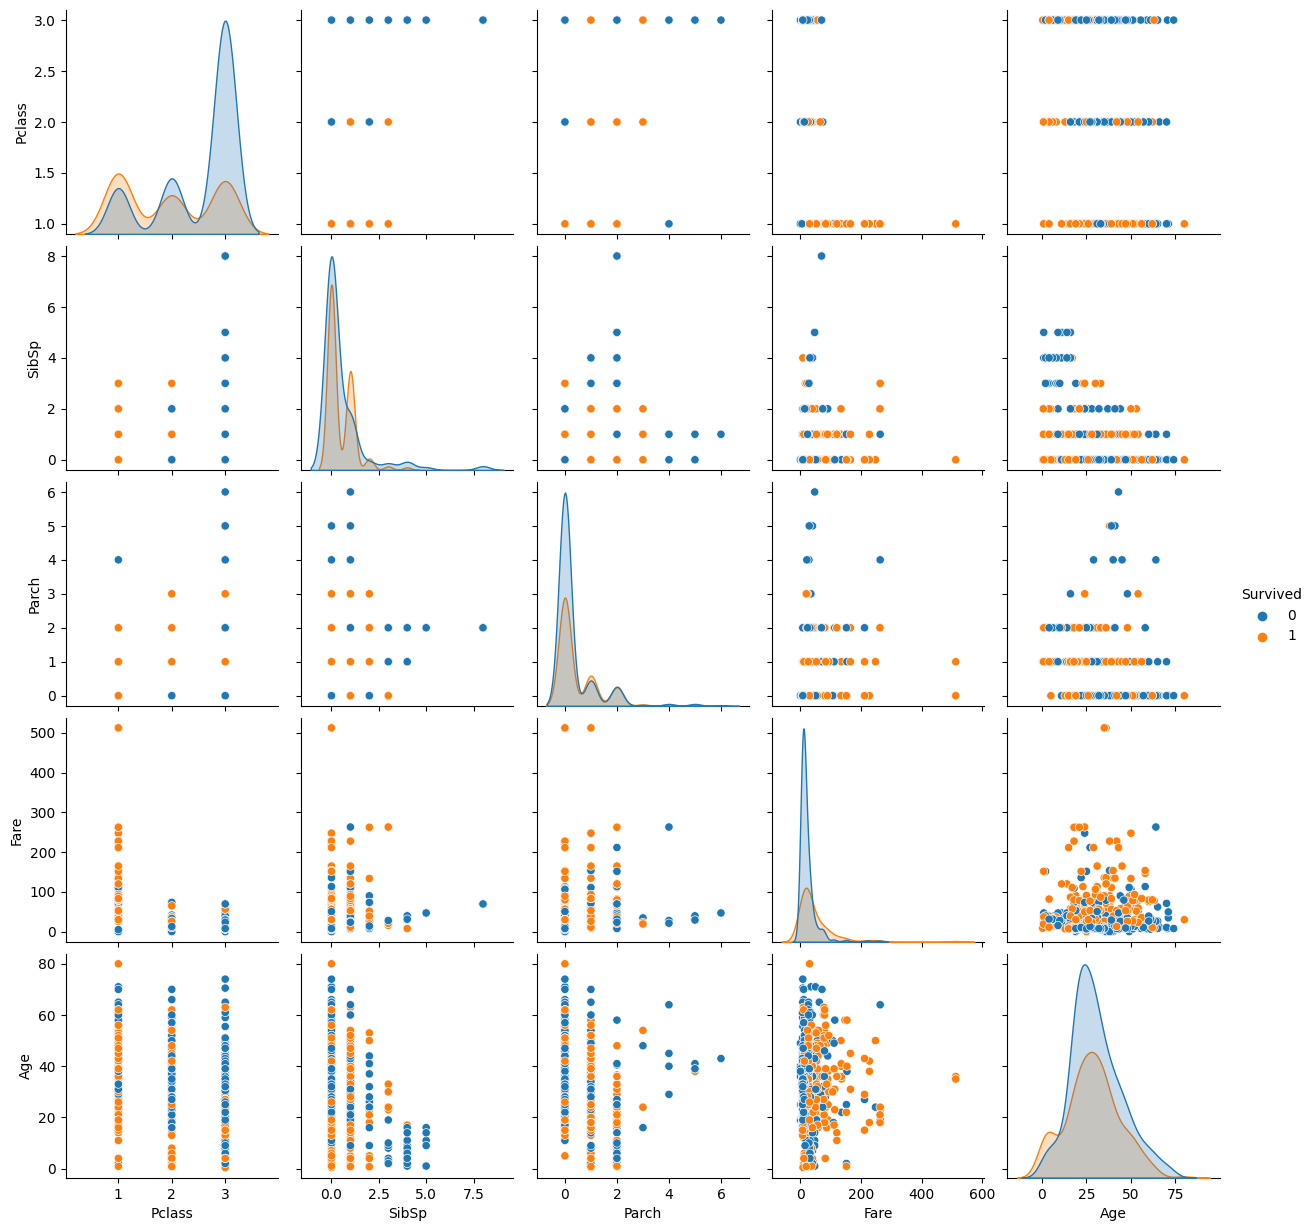

In [51]:
sns.pairplot(titanic_df[["Survived", "Pclass","SibSp", "Parch", "Fare", "Age"]], hue="Survived") 


<blockquote> 
❓ What insights can we get from the pairplot??
</blockquote>

Looking at how correlated variables are with each other and with what we want to predict can be helpful.

💡 Reminder: correlation is how related two variables are. A correlation of 1(-1) means that if variable A increases then B increases(decreases).

In future lectures we will investigate common pitfalls with correlation and how to interpret them in a data science context.

C:\Users\Cristina\AppData\Local\Temp\ipykernel_19004\88440536.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_df.corr(), cmap="viridis")


<AxesSubplot: >

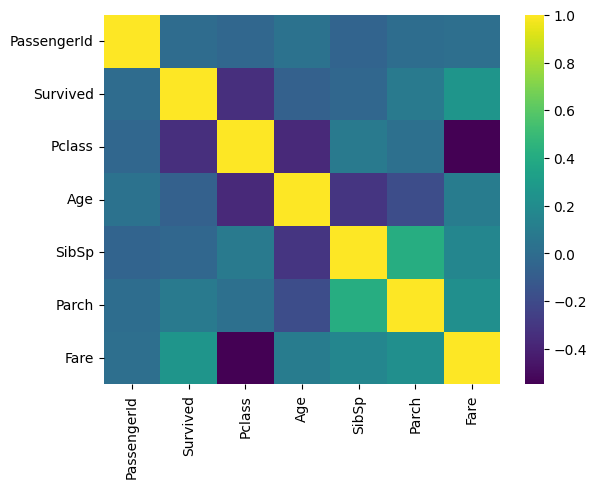

In [52]:
sns.heatmap(titanic_df.corr(), cmap="viridis")

<blockquote> 
❓ What insights can we get from the heatmap?
</blockquote>

There are many more insights you could get from looking at this plot.

<blockquote> 

**1:** The largest group of survivors were in first class.

**2:** People with a higher fair seem to survive at a higher rate.

**3:** Having a large number of siblings and parents aboard (4 +) lowers the survival rate.

</blockquote> 

<blockquote> 
📚 Homework question 2: Try and get additional insights from the two plots and the extra variables you investigated in the previous question.
</blockquote> 

### Data preparation

1. Selecting data: What portion (e.g. tables, columns) will we use?
2. Cleaning data: Are there errors, null values, ... we need to deal with first?
3. Constructing data: Can we derive new attributes (usually called "features") from the data?
4. Integrating data: Bringing the data together from different places.
5. Formatting data: Preserving the data in a format that is easy to use?


The Titanic case is a beginner level project so this does not play a big role here. In the real world and advanced level practice cases this is the deciding factor.

Step 3 can still be applied here. For example:
* The name variable contains the person's title. Married men and women might have different survival rates.
*  We could fill in the cabin name by looking at the ticket class. 
*  Do you have any more suggestions?

The first assignment you will do in the course will focus on this step. 

<blockquote> 

#### ❓ Are we ready to apply a machine learning model? 

</blockquote> 


### Modelling

1. Selecting modeling techniques: What algorithms will we test?
2. Designing tests: How do we test how well our model works?
3. Building the models: We train the selected models
4. Assessing the models: Models can be assessed from a technical point of view (how well do they perform, how fast are they, how scalable are they) but also from a business standpoint (does the output make sense).

❗ There are a lot of different machine learning algorithms out there. The goal of this course is not to discuss them one by one as was done in Business Analytics minor but rather to view this step as one step in an entire process. Not everyone has taken BA minor as we have both have students following from Limburg and abroad.

In later lectures we provide you with tricks on how to select the right algorithm(s) for the right task without knowing the finer details of each of them. 

Students following the 4 ECTS version of this course have 2 tests, one on Python for data science and a second one on AI algorithms. Students from the 6 ECTS version of the course can use this to brush up on their knowledge but are not required to.

#### 💻🤖 ```Sci-kit learn``` is the main machine learning package we will be using. It contains most popular algorithms together with other things from the wider data science toolbox such as model evaluation and data preparation. A key feature of sci-kit learn are Pipelines. 

##### 💻🤖 The ```Pipeline``` class allows you to chain multiple steps after each other. This enables you to carry out transformations of your data (data preparation step in CRISP-DM) and modeling at the same time. Another advantage is that this enables you to deploy, monitor and version control your machine learning models in a correct way. Time permitting, We will discuss this at more length in the end of the course. 

💡 Machine learning models can only take numeric input. We need to transform the textual variables to so-called onehot encoded variables. The image below is an intuitive explanation

<center> <img src="images\1_ggtP4a5YaRx6l09KQaYOnw.png"></center>



💡 A second transformation we need to do is ensure the data is on the same scale. Otherwise one variable will have more weight to the machine learning model. 

<center> <img src="images\standard scaling.png"></center>


💡 Finally, we impute (fill in the blanks) of the missing values with their mean. 
<center> <img src="images\mean imputation.png"></center>


**These techniques will be discussed at length in the classes that correspond to the respective steps in the CRISP-DM process. Don't worry if they seem arbitrary right now.**

<blockquote> 

##### ❓ What techniques would you apply to what variables? 

</blockquote> 

<blockquote> 

#### 📚 Optional homework:

These are open ended, you do not need to complete these (by the next lecture). They are rather for students that want to work more ahead of time or need to refresh some concepts. **Most of these will be covered in later lectures.**

1. For those not familiar with Python or want a comprehensive refresher: Read chapter 3, 4, 5 in "A Beginners Guide to Python 3 Programming" (Check Toledo on how to get free access).
2. 💡 **Especially for international students and students Limburg**: Read chapter 1 of "Python Data Analytics".
3. For those that know SQL well and want to get started with Pandas with a short guide: https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html
4. 10 minute introduction to Pandas: https://pandas.pydata.org/docs/user_guide/10min.html 
5. Introduction to Seaborn: https://seaborn.pydata.org/tutorial/introduction.html
6. For those with a lot of time left: Chapter 2 and 3 of "Python Data Analytics" 

</blockquote> 

<br>
